In [ ]:
library(rio)
library(tidyverse)
library(smwrGraphs)

In [2]:
theme_glab <- function(base_size = 11,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.35),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}

In [3]:
PROJECT_NAME = "arg23"

DATA_DIR = file.path(
    "../data/",
    PROJECT_NAME
)

## Decription of the input files

* **DIC data** - *ARG23.xlsx*

* **IC data** - *Anioni_Cationi_ARG23.xlsx*

* **ICP-MS data** - *ARG23_dil1at10.xlsx*

## DIC analysis

In [4]:
dic_df = import(
    file=file.path(
        DATA_DIR,
        "ARG23.xlsx"
    ),
    skip=4
)

dic_df = dic_df %>%
    # Drop NA rows
    drop_na(Name) %>%
    # Format "Sample Type"
    mutate(`Sample Type`=str_replace_all(
            string=`Sample Type`,
            pattern="\\(|\\)",
            replacement=""
        )
    ) %>%
    # Convert to numeric
    mutate(
        `Height (nA)`=as.numeric(`Height (nA)`),
        `δ¹³C (Gas)`=as.numeric(`δ¹³C (Gas)`)
    ) %>%
    # Group by name and calculate the mean
    group_by(Name) %>%
    summarise(
        Height_mean=mean(`Height (nA)`),
        DeltaC13_mean=mean(`δ¹³C (Gas)`),
        DeltaC13_sd=sd(`δ¹³C (Gas)`) # TODO: check use of SE
    )

dic_df = dic_df %>%
    # Natural sort by name
    slice(stringr::str_order(dic_df$Name, numeric=TRUE)) %>%
    # Transform to factor for plotting the samples in the correct order
    mutate(Name=factor(Name, levels=Name))

dic_df

Name,Height_mean,DeltaC13_mean,DeltaC13_sd
<fct>,<dbl>,<dbl>,<dbl>
ARG23_1,6.4190218,-3.4409935,0.1359016
ARG23_2,4.0301275,-5.5271253,0.2716068
ARG23_3,5.4543274,-3.1768285,0.8068695
ARG23_4,3.5758961,-9.9798606,0.4742499
ARG23_5,1.8756161,-5.9922322,0.7973183
ARG23_6,12.8719853,-2.6227354,0.5387774
ARG23_7,1.4093049,-6.6174893,0.7180623
ARG23_8,4.7544556,-5.8113600,0.2032612
ARG23_9,2.6648682,-4.2482822,0.1525767


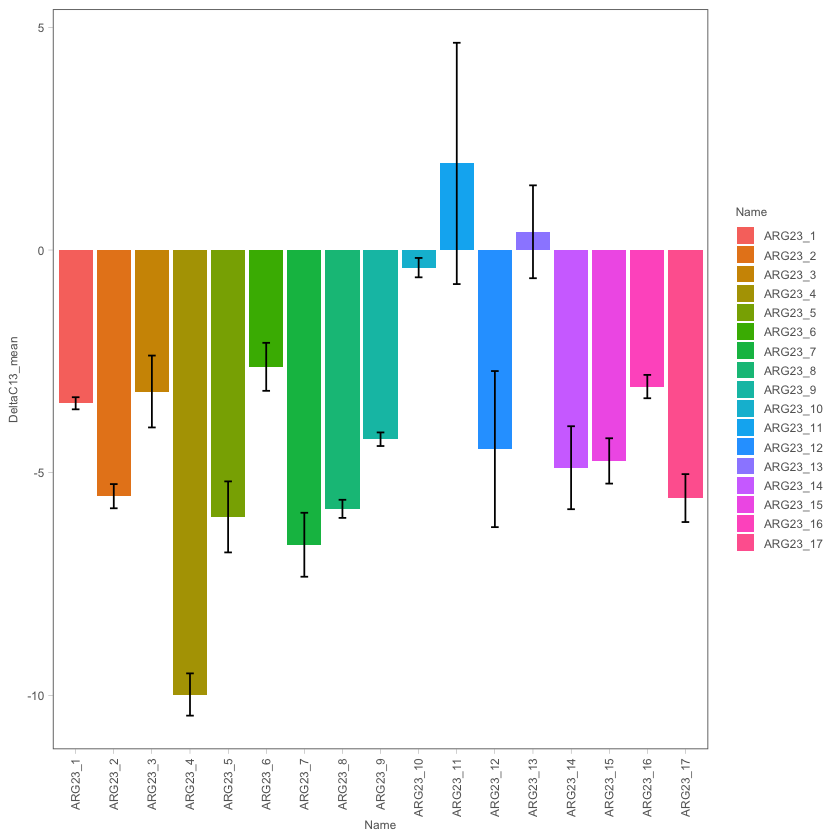

In [5]:
plot_dic = ggplot(
        data=dic_df,
        aes(
            x=Name,
            y=DeltaC13_mean,
            fill=Name
        )
    ) +
    geom_col() +
    geom_errorbar(
        aes(
            ymin=DeltaC13_mean - DeltaC13_sd,
            ymax=DeltaC13_mean + DeltaC13_sd
        ),
        width=.2
    ) +
    theme_glab() +
    # Rotate X axis labels
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1))

plot_dic

## IC analysis

In [6]:
ic_df = import(
    file=file.path(
        DATA_DIR,
        "Anioni_Cationi_ARG23.xlsx"
    )
)

## ICP-MS analysis

In [ ]:
icp_df = import(
    file=file.path(
        DATA_DIR,
        "ARG23_dil1at10.xlsx"
    )
)